In [51]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [52]:
# 데이터 로드 및 정보 확인
# 데이터 로드
df = pd.read_csv('Mall_Customers.csv')

# 데이터 정보 확인
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [53]:
# 불필요한 열 제거 및 원-핫 인코딩
# 불필요한 인덱스 열 제거
df = df.drop(columns=['CustomerID'])

# 원-핫 인코딩
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# 비지도 학습에서 범주형 변수를 원-핫 인코딩 하면 거리계산이 왜곡될 수 있음
# 따라서 원-핫 인코딩을 하지 않고 수치형 변수만 사용
df = df.drop(columns=['Gender_Male'])
print(df.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


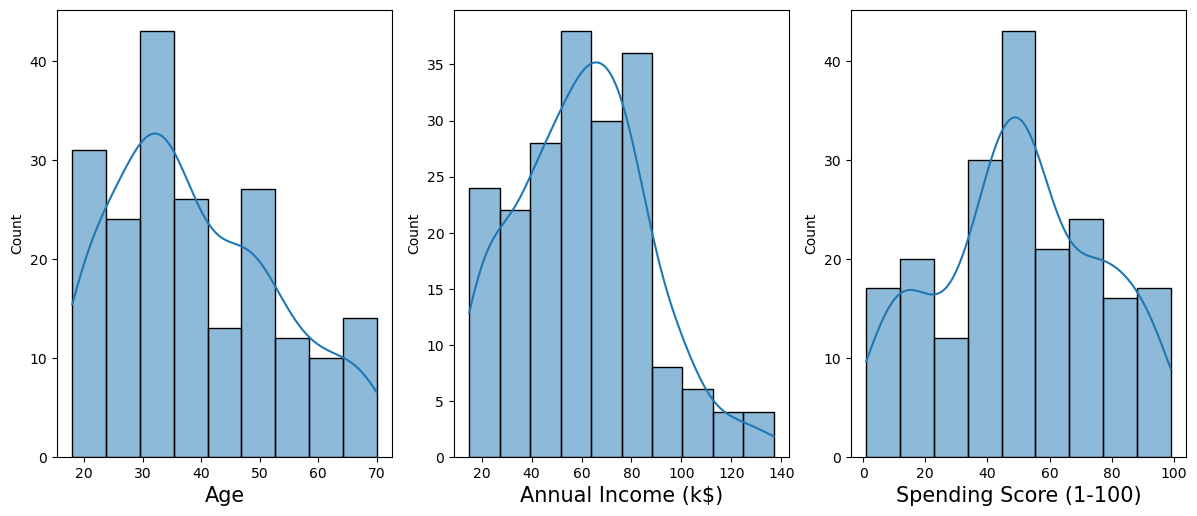

In [54]:
# 히스토그램을 통한 데이터 분포 확인
# 분포 확인
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column, fontsize=15)
        plotnumber += 1

plt.tight_layout()
plt.show()

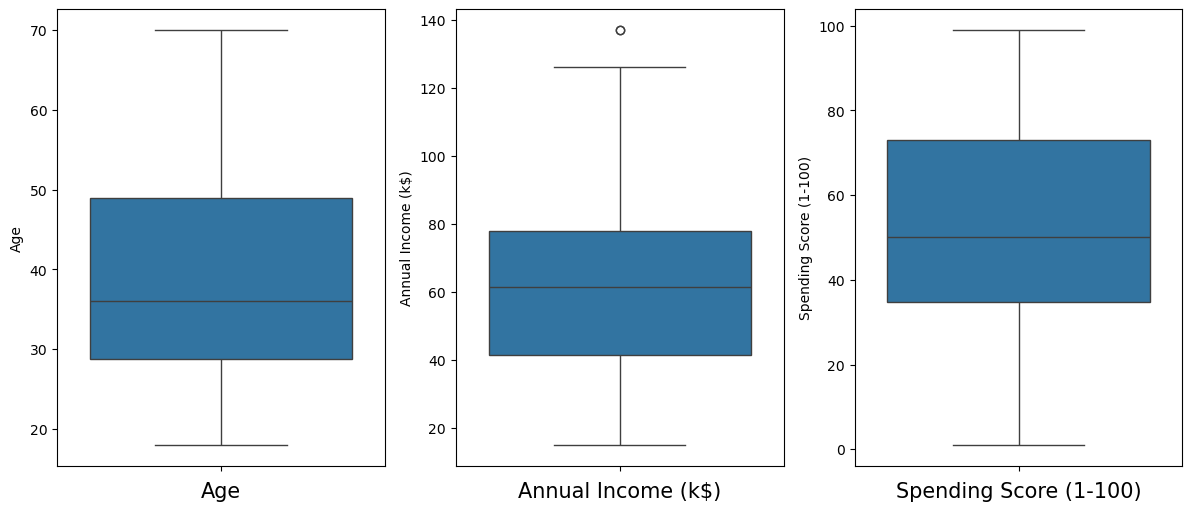

In [55]:
# 박스플롯을 통한 이상치 확인
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.boxplot(y=df[column], ax=ax)
        plt.xlabel(column, fontsize=15)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [56]:
# 데이터 스케일링
# 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
# scaled_df = scaled_df.drop(columns=['Gender_Male'])

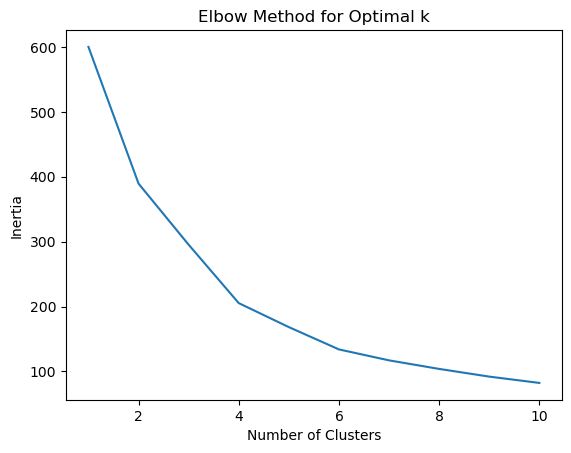

In [57]:
# K-means 클러스터링 (엘보우 방법)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

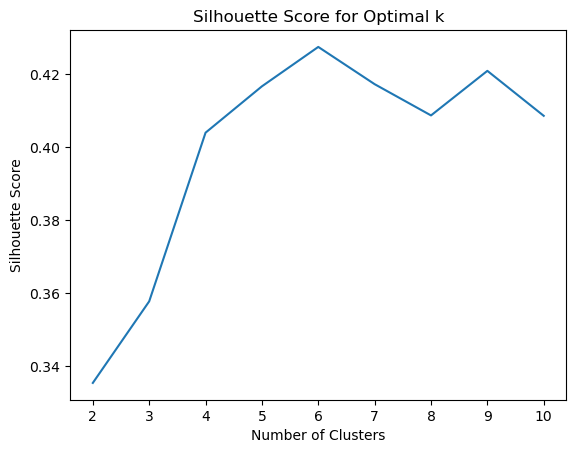

In [58]:
# K-means 클러스터링 (실루엣 점수)
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_labels = kmeans.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [59]:
# K-means 모델 학습 및 클러스터 라벨 저장
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_df)
df['KMeans_Cluster'] = kmeans_labels

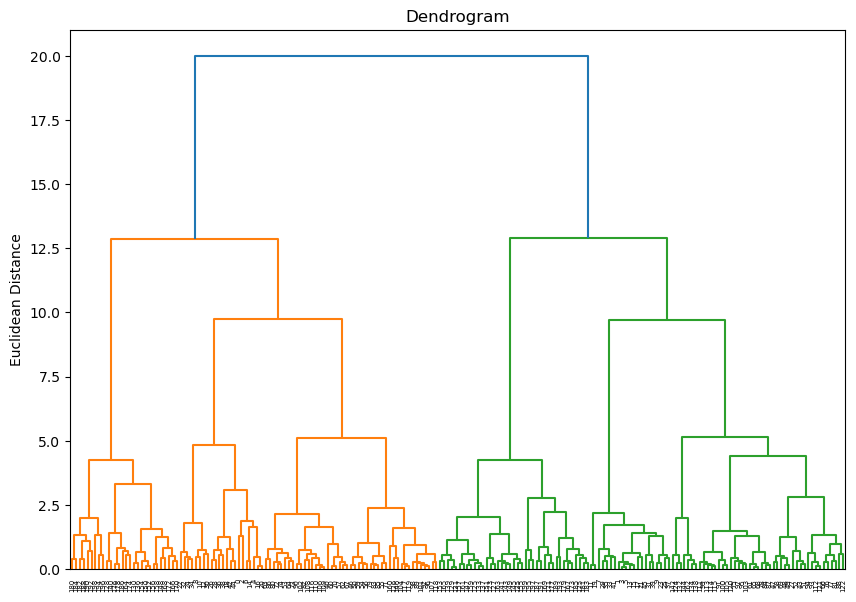

In [60]:
# 덴드로그램 시각화 (계층적 군집화)
plt.figure(figsize=(10, 7))
dend = dendrogram(linkage(scaled_df, method='ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')
plt.show()

In [61]:
# 계층적 군집화 모델 학습 및 클러스터 라벨 저장
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_cluster.fit_predict(scaled_df)
df['Agg_Cluster'] = agg_labels

In [62]:
# DBSCAN 모델 학습 및 클러스터 라벨 저장
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)
df['DBSCAN_Cluster'] = dbscan_labels

In [63]:
# GMM 모델 학습 및 클러스터 라벨 저장
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(scaled_df)
df['GMM_Cluster'] = gmm_labels

In [64]:
# PCA 적용 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
df['pca_x'] = pca_result[:, 0]
df['pca_y'] = pca_result[:, 1]

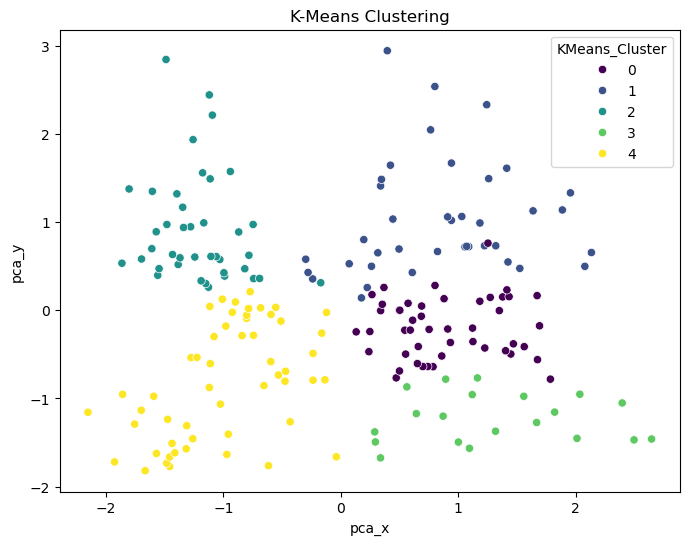

In [65]:
# 클러스터링 결과 시각화 (K-means)
sns.scatterplot(x='pca_x', y='pca_y', hue='KMeans_Cluster', palette='viridis', data=df)
plt.title('K-Means Clustering')
plt.show()

In [66]:
# PCA 적용 (3차원 시각화를 위한 PCA)
pca = PCA(n_components=3)  # 3차원 시각화를 위해 3개의 주성분 선택
pca_result = pca.fit_transform(scaled_df)
df['pca_x'] = pca_result[:, 0]
df['pca_y'] = pca_result[:, 1]
df['pca_z'] = pca_result[:, 2]

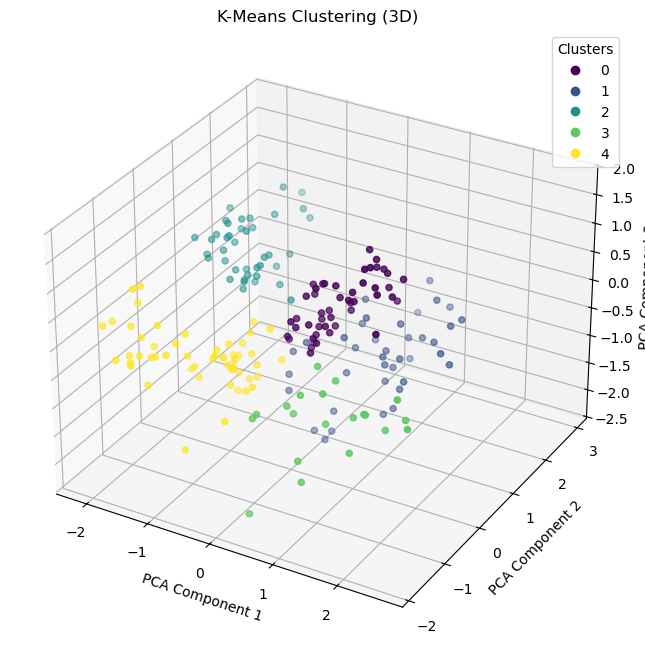

In [67]:
# K-means 클러스터 시각화 (3차원)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['pca_x'], df['pca_y'], df['pca_z'], c=df['KMeans_Cluster'], cmap='viridis')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('K-Means Clustering (3D)')

# 범례 추가
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

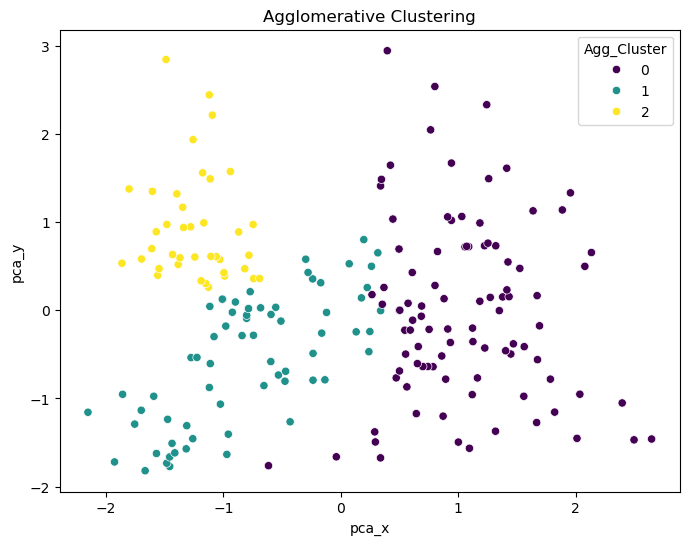

In [68]:
# 클러스터링 결과 시각화 (계층적 군집화)
# 계층적 군집화 결과를 2차원 산점도로 시각화합니다.
# PCA를 통해 축소된 데이터를 사용하여 각 클러스터를 다른 색상으로 표시합니다.
# 시각화를 통해 클러스터 간의 분포를 파악할 수 있습니다.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_x', y='pca_y', hue='Agg_Cluster', palette='viridis', data=df)
plt.title('Agglomerative Clustering')
plt.show()

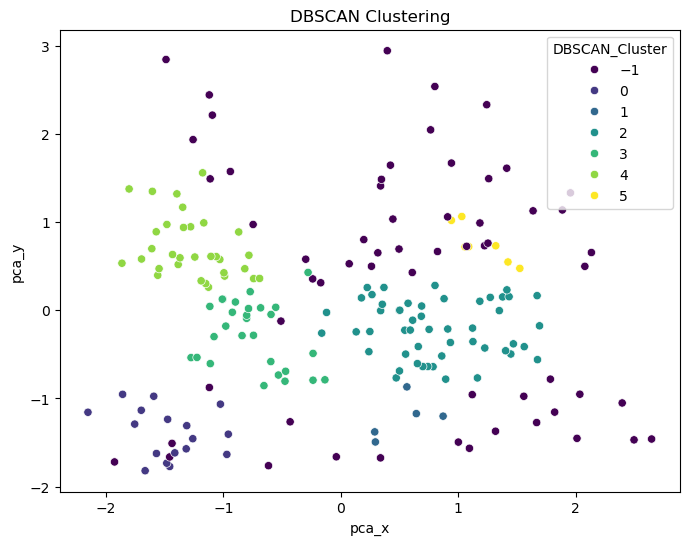

In [69]:
# 클러스터링 결과 시각화 (DBSCAN)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_x', y='pca_y', hue='DBSCAN_Cluster', palette='viridis', data=df)
plt.title('DBSCAN Clustering')
plt.show()

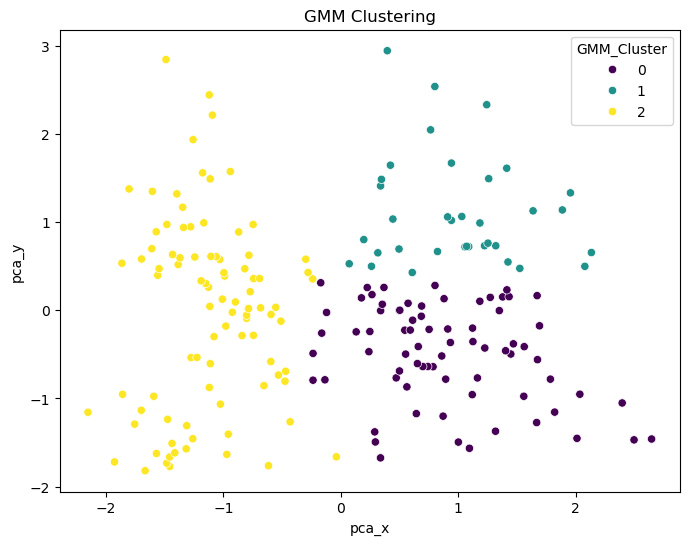

In [70]:
# 클러스터링 결과 시각화 (GMM)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_x', y='pca_y', hue='GMM_Cluster', palette='viridis', data=df)
plt.title('GMM Clustering')
plt.show()

In [71]:
# 클러스터별 평균 특징 분석 (K-means)
print("--- K-means 클러스터별 평균 특징 분석 ---")
kmeans_cluster_summary = df.groupby('KMeans_Cluster').mean()
print(kmeans_cluster_summary)

--- K-means 클러스터별 평균 특징 분석 ---
                      Age  Annual Income (k$)  Spending Score (1-100)  \
KMeans_Cluster                                                          
0               55.638298           54.382979               48.851064   
1               39.871795           86.102564               19.358974   
2               32.875000           86.100000               81.525000   
3               46.250000           26.750000               18.350000   
4               25.185185           41.092593               62.240741   

                Agg_Cluster  DBSCAN_Cluster  GMM_Cluster     pca_x     pca_y  \
KMeans_Cluster                                                                 
0                  0.085106        1.872340     0.021277  0.899383 -0.197204   
1                  0.230769        0.333333     1.025641  0.850509  1.021244   
2                  1.975000        3.000000     1.950000 -1.208516  0.914846   
3                  0.000000       -0.200000     0.000000 

In [72]:
# 클러스터별 평균 특징 분석 (계층적 군집화)
print("\n--- 계층적 군집화 클러스터별 평균 특징 분석 ---")
agg_cluster_summary = df.groupby('Agg_Cluster').mean()
print(agg_cluster_summary)


--- 계층적 군집화 클러스터별 평균 특징 분석 ---
                   Age  Annual Income (k$)  Spending Score (1-100)  \
Agg_Cluster                                                          
0            49.915789           59.063158               32.515789   
1            26.560606           47.363636               56.787879   
2            32.692308           86.538462               82.128205   

             KMeans_Cluster  DBSCAN_Cluster  GMM_Cluster     pca_x     pca_y  \
Agg_Cluster                                                                    
0                  1.031579        0.905263     0.368421  1.048547 -0.007196   
1                  3.318182        1.318182     1.575758 -0.779430 -0.539354   
2                  2.000000        3.102564     2.000000 -1.235118  0.930282   

                pca_z  
Agg_Cluster            
0            0.075930  
1           -0.445620  
2            0.569168  


In [73]:
# 클러스터별 평균 특징 분석 (DBSCAN)
print("\n--- DBSCAN 클러스터별 평균 특징 분석 ---")
dbscan_cluster_summary = df.groupby('DBSCAN_Cluster').mean()
print(dbscan_cluster_summary)


--- DBSCAN 클러스터별 평균 특징 분석 ---
                      Age  Annual Income (k$)  Spending Score (1-100)  \
DBSCAN_Cluster                                                          
-1              40.133333           68.533333               31.533333   
 0              23.764706           25.823529               78.176471   
 1              38.200000           27.800000               31.800000   
 2              53.666667           54.156863               48.411765   
 3              24.107143           54.321429               50.464286   
 4              32.750000           80.875000               83.625000   
 5              43.857143           78.714286               14.571429   

                KMeans_Cluster  Agg_Cluster  GMM_Cluster     pca_x     pca_y  \
DBSCAN_Cluster                                                                 
-1                    1.933333     0.450000     1.033333  0.562204  0.334132   
 0                    4.000000     1.000000     2.000000 -1.468068 -1.3

In [74]:
# 클러스터별 평균 특징 분석 (GMM)
print("\n--- GMM 클러스터별 평균 특징 분석 ---")
gmm_cluster_summary = df.groupby('GMM_Cluster').mean()
print(gmm_cluster_summary)


--- GMM 클러스터별 평균 특징 분석 ---
                   Age  Annual Income (k$)  Spending Score (1-100)  \
GMM_Cluster                                                          
0            50.837838           46.675676               40.486486   
1            41.685714           88.228571               17.285714   
2            28.010989           61.208791               70.758242   

             KMeans_Cluster  Agg_Cluster  DBSCAN_Cluster     pca_x     pca_y  \
GMM_Cluster                                                                    
0                  1.135135     0.162162        1.364865  0.899474 -0.489162   
1                  0.971429     0.114286        0.200000  0.995408  1.109262   
2                  3.043956     1.406593        2.043956 -1.114290 -0.028859   

                pca_z  
GMM_Cluster            
0            0.338946  
1           -0.753779  
2            0.014288  


In [75]:
# 분류 모델 학습 (로지스틱 회귀, 랜덤 포레스트)
X = df.drop(columns=['KMeans_Cluster', 'Agg_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'pca_x', 'pca_y']) # 클러스터 라벨과 PCA 결과 제거
y = df['KMeans_Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델
logistic_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

print("\n--- Logistic Regression Model ---")
print(classification_report(y_test, logistic_predictions))
print(f"Accuracy: {accuracy_score(y_test, logistic_predictions):.4f}")

# 랜덤 포레스트 모델
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\n--- Random Forest Model ---")
print(classification_report(y_test, rf_predictions))
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")


--- Logistic Regression Model ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      1.00      1.00        15
           2       1.00      0.90      0.95        10
           3       1.00      0.80      0.89         5
           4       0.94      1.00      0.97        15

    accuracy                           0.97        60
   macro avg       0.97      0.94      0.95        60
weighted avg       0.97      0.97      0.97        60

Accuracy: 0.9667

--- Random Forest Model ---
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        15

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99       